In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import datetime
import tensorflow_data_validation as tfdv

2022-10-17 00:45:24.026384: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# read parquet files via Pandas within python
jan2020 = pd.read_parquet('yellow_tripdata_2020-01.parquet', engine='fastparquet')
mar2020 = pd.read_parquet('yellow_tripdata_2020-03.parquet', engine='fastparquet')
may2020 = pd.read_parquet('yellow_tripdata_2020-05.parquet', engine='fastparquet')

In [3]:
# check total data volume
jan2020.shape, mar2020.shape, may2020.shape

((6405008, 19), (3007687, 19), (348415, 19))

# Training dataset on data based on March of 2020

## Prep the data in order to be ready to be fed to a model.

In [4]:
# check data on March
mar2020

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2020-03-01 00:31:13,2020-03-01 01:01:42,1.0,4.70,1.0,N,88,255,1,22.00,3.0,0.5,2.00,0.0,0.3,27.80,2.5,NaN
1,2,2020-03-01 00:08:22,2020-03-01 00:08:49,1.0,0.00,1.0,N,193,193,2,2.50,0.5,0.5,0.00,0.0,0.3,3.80,0.0,NaN
2,1,2020-03-01 00:52:18,2020-03-01 00:59:16,1.0,1.10,1.0,N,246,90,1,6.00,3.0,0.5,1.95,0.0,0.3,11.75,2.5,NaN
3,2,2020-03-01 00:47:53,2020-03-01 00:50:57,2.0,0.87,1.0,N,151,238,1,5.00,0.5,0.5,1.76,0.0,0.3,10.56,2.5,NaN
4,1,2020-03-01 00:43:19,2020-03-01 00:58:27,0.0,4.40,1.0,N,79,261,1,16.50,3.0,0.5,4.05,0.0,0.3,24.35,2.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3007682,2,2020-03-31 23:21:00,2020-03-31 23:33:00,NaN,5.43,NaN,None,137,87,0,30.47,0.0,0.5,0.00,0.0,0.3,33.77,NaN,NaN
3007683,2,2020-03-31 23:57:00,2020-04-01 00:26:00,NaN,13.21,NaN,None,137,71,0,37.97,0.0,0.5,0.00,0.0,0.3,41.27,NaN,NaN
3007684,2,2020-03-31 23:22:01,2020-03-31 23:43:52,NaN,12.14,NaN,None,137,32,0,37.10,0.0,0.0,0.00,0.0,0.3,39.90,NaN,NaN
3007685,2,2020-03-31 23:18:53,2020-03-31 23:32:21,NaN,7.01,NaN,None,137,159,0,20.07,0.0,0.0,0.00,0.0,0.3,22.87,NaN,NaN


In [6]:
# keep date and remove time of pickup
mar2020['date']=mar2020['tpep_pickup_datetime'].apply(lambda i: str(i).split(' ')[0])
mar2020['date']=pd.to_datetime(mar2020['date'])
jan2020['date']=jan2020['tpep_pickup_datetime'].apply(lambda i: str(i).split(' ')[0])
jan2020['date']=pd.to_datetime(jan2020['date'])

In [7]:
# check data volume for eveyday on March 2020
mar2020.date.value_counts()

2020-03-05    244448
2020-03-06    243741
2020-03-04    229734
2020-03-03    222917
2020-03-07    208190
2020-03-02    193514
2020-03-10    184110
2020-03-11    182663
2020-03-01    179760
2020-03-09    175594
2020-03-12    171096
2020-03-08    165787
2020-03-13    134723
2020-03-14     89672
2020-03-16     64226
2020-03-15     59894
2020-03-17     45639
2020-03-18     36266
2020-03-19     29813
2020-03-20     27644
2020-03-21     16177
2020-03-23     13580
2020-03-24     11858
2020-03-27     11785
2020-03-25     11211
2020-03-26     10669
2020-03-22     10341
2020-03-30      9586
2020-03-31      9447
2020-03-28      7635
2020-03-29      5541
2020-02-29       271
2020-01-30        21
2020-02-01        19
2020-01-28        18
2020-01-31        15
2020-02-02        13
2009-01-01        12
2020-01-29        10
2020-01-27         5
2008-12-31         5
2020-04-21         5
2020-04-25         4
2020-06-07         4
2020-06-03         4
2020-06-24         3
2020-04-04         3
2020-06-28   

In [8]:
# only keep data between 3-10 to 3-31
mar2020 = mar2020[mar2020['date']  >='2020-03-01']
mar2020 = mar2020[mar2020['date']  <='2020-03-31']
jan2020 = jan2020[jan2020['date']  >='2020-01-01']
jan2020 = jan2020[jan2020['date']  <='2020-01-31']

In [10]:
# check again to make sure
jan2020.date.value_counts()

2020-01-17    243682
2020-01-30    242994
2020-01-16    239657
2020-01-31    236085
2020-01-24    233291
2020-01-23    232096
2020-01-09    231684
2020-01-10    228201
2020-01-29    227420
2020-01-25    223220
2020-01-22    221897
2020-01-14    217722
2020-01-11    217503
2020-01-15    217496
2020-01-08    217100
2020-01-28    215813
2020-01-21    213823
2020-01-13    209210
2020-01-07    201520
2020-01-18    190158
2020-01-27    189786
2020-01-26    188185
2020-01-12    186745
2020-01-03    183477
2020-01-04    182752
2020-01-06    179515
2020-01-19    175831
2020-01-01    169437
2020-01-05    164399
2020-01-02    162141
2020-01-20    161956
Name: date, dtype: int64

In [11]:
mar2020.date.value_counts()

2020-03-05    244448
2020-03-06    243741
2020-03-04    229734
2020-03-03    222917
2020-03-07    208190
2020-03-02    193514
2020-03-10    184110
2020-03-11    182663
2020-03-01    179760
2020-03-09    175594
2020-03-12    171096
2020-03-08    165787
2020-03-13    134723
2020-03-14     89672
2020-03-16     64226
2020-03-15     59894
2020-03-17     45639
2020-03-18     36266
2020-03-19     29813
2020-03-20     27644
2020-03-21     16177
2020-03-23     13580
2020-03-24     11858
2020-03-27     11785
2020-03-25     11211
2020-03-26     10669
2020-03-22     10341
2020-03-30      9586
2020-03-31      9447
2020-03-28      7635
2020-03-29      5541
Name: date, dtype: int64

## Look for missing, null, NaN records.

In [12]:
mar2020.isnull().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            37808
trip_distance                  0
RatecodeID                 37808
store_and_fwd_flag         37808
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge       37808
airport_fee              3007261
date                           0
dtype: int64

In [13]:
# remove airpost_fee due to too much empty data of airport_fee because this is a new column from 05/13/2022
mar2020 = mar2020.drop('airport_fee', axis=1)
jan2020 = jan2020.drop('airport_fee', axis=1)

In [14]:
# In order to improve ride time predictions, add column: ride_time
mar2020['ride_time']=(mar2020['tpep_dropoff_datetime'] - mar2020['tpep_pickup_datetime']).dt.seconds/60
jan2020['ride_time']=(jan2020['tpep_dropoff_datetime'] - jan2020['tpep_pickup_datetime']).dt.seconds/60

## List all types of data, numeric, categorical,...

In [16]:
mar2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3007261 entries, 0 to 3007686
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  date                  

## Transform data – all entries should be numeric.

In [17]:
# from above, the dataType of store_and_forward_flag is object
mar2020.store_and_fwd_flag.value_counts()

N    2941472
Y      27981
Name: store_and_fwd_flag, dtype: int64

In [18]:
# transform non-numeric data to numeric data
mar2020 = mar2020.replace({'N':0, 'Y':1})

In [19]:
# after transform, check again
mar2020.store_and_fwd_flag.value_counts()

0.0    2941472
1.0      27981
Name: store_and_fwd_flag, dtype: int64

In [20]:
# Count number of distinct elements in specified axis. Return Series with number of distinct elements. Can ignore NaN values.
mar2020.nunique()

VendorID                       4
tpep_pickup_datetime     1226056
tpep_dropoff_datetime    1226549
passenger_count               10
trip_distance               3963
RatecodeID                     7
store_and_fwd_flag             2
PULocationID                 260
DOLocationID                 261
payment_type                   5
fare_amount                 6402
extra                        302
mta_tax                        7
tip_amount                  3042
tolls_amount                 664
improvement_surcharge          3
total_amount               10882
congestion_surcharge           6
date                          31
ride_time                   9826
dtype: int64

## Remove abnormal data according to Data Dictionary

### Vendor ID

In [21]:
# check VendorID: 1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.
mar2020.VendorID.value_counts()

2    2018292
1     988484
6        476
5          9
Name: VendorID, dtype: int64

In [22]:
# drop VendorID >2
mar2020 = mar2020.drop(mar2020[(mar2020.VendorID >2)].index)
jan2020 = jan2020.drop(jan2020[(jan2020.VendorID >2)].index)

### Passenger_count

In [23]:
# check how many passenger per trip
mar2020.passenger_count.value_counts()

1.0    2187111
2.0     407457
3.0     106495
5.0      96958
0.0      63431
6.0      59555
4.0      48422
7.0         10
9.0          9
8.0          5
Name: passenger_count, dtype: int64

In [24]:
# drop 
mar2020 = mar2020.drop(mar2020[(mar2020.passenger_count<=0) | (mar2020.passenger_count>=7)].index)
jan2020 = jan2020.drop(jan2020[(jan2020.passenger_count<=0) | (jan2020.passenger_count>=7)].index)

### trip distance

In [25]:
# check trip distance per trip to make sure all distance above 0
mar2020.trip_distance.value_counts()

0.80     50016
0.90     49955
1.00     49286
0.70     47376
1.10     47130
         ...  
34.97        1
34.68        1
38.48        1
52.59        1
35.36        1
Name: trip_distance, Length: 3954, dtype: int64

In [26]:
mar2020 = mar2020.drop(mar2020[(mar2020.trip_distance<=0)| (mar2020.trip_distance>25)].index)
jan2020 = jan2020.drop(jan2020[(jan2020.trip_distance<=0)| (jan2020.trip_distance>25)].index)

### rateCodeID

In [27]:
# check rateCodeID 1= Standard rate 2=JFK 3=Newark 4=Nassau or Westchester 5=Negotiated fare 6=Group ride
mar2020.RatecodeID.value_counts()

1.0     2803855
2.0       54517
5.0        6533
3.0        5168
4.0        1551
99.0         61
6.0           4
Name: RatecodeID, dtype: int64

In [28]:
mar2020 = mar2020.drop(mar2020[(mar2020.RatecodeID==99)].index)
jan2020 = jan2020.drop(jan2020[(jan2020.RatecodeID==99)].index)

### Payment type

In [29]:
# check payment type 1= Credit card 2= Cash 3= No charge 4= Dispute 5= Unknown 6= Voided trip
mar2020.payment_type.value_counts()

1    2141889
2     707782
0      36926
3      13535
4       8422
Name: payment_type, dtype: int64

In [30]:
# drop payment type = 0 
mar2020 = mar2020.drop(mar2020[(mar2020.payment_type ==0)].index)
jan2020 = jan2020.drop(jan2020[(jan2020.payment_type ==0)].index)

In [31]:
# after removing the abnormal data
mar2020.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,2871628.0,1.683858,0.464969,1.00,1.000000,2.00,2.000000,2.000000
passenger_count,2871628.0,1.501936,1.113510,1.00,1.000000,1.00,1.000000,6.000000
trip_distance,2871628.0,2.814331,3.419358,0.01,1.000000,1.67,3.000000,25.000000
RatecodeID,2871628.0,1.033311,0.257623,1.00,1.000000,1.00,1.000000,6.000000
store_and_fwd_flag,2871628.0,0.008571,0.092181,0.00,0.000000,0.00,0.000000,1.000000
PULocationID,2871628.0,163.873074,66.337750,1.00,116.000000,162.00,234.000000,265.000000
DOLocationID,2871628.0,161.258106,70.465641,1.00,107.000000,162.00,234.000000,265.000000
payment_type,2871628.0,1.264699,0.470805,1.00,1.000000,1.00,2.000000,4.000000
fare_amount,2871628.0,12.307456,396.151491,-1259.00,6.500000,9.00,13.500000,671100.140000
extra,2871628.0,1.066705,1.231929,-4.50,0.000000,0.50,2.500000,30.300000


### fare_amount

In [32]:
# fare_amount looks abnormal
print(mar2020['fare_amount'].nlargest(200))

732292     671100.14
2848144      1259.00
2291480       632.50
2721100       475.50
2599350       460.00
             ...    
2028327       124.00
2629969       124.00
2764368       124.00
1611128       123.50
1489553       123.00
Name: fare_amount, Length: 200, dtype: float64


In [33]:
mar2020 = mar2020.drop(mar2020[(mar2020.fare_amount<0) | (mar2020.fare_amount>20)].index)
jan2020 = jan2020.drop(jan2020[(jan2020.fare_amount<0) | (jan2020.fare_amount>20)].index)

### extra

In [34]:
# fare_amount looks abnormal
print(mar2020['extra'].nlargest(200))

1454582    18.50
2425260     4.14
1949559     3.95
823         3.50
42930       3.50
           ...  
132496      3.50
132497      3.50
132498      3.50
132517      3.50
132518      3.50
Name: extra, Length: 200, dtype: float64


In [35]:
mar2020 = mar2020.drop(mar2020[(mar2020.extra<0) | (mar2020.extra>3.5)].index)
jan2020 = jan2020.drop(jan2020[(jan2020.extra<0) | (jan2020.extra>3.5)].index)

### tip_amount

In [36]:
# fare_amount looks abnormal
print(mar2020['tip_amount'].nlargest(200))

563163     493.22
535580     445.50
2826837    383.00
2478586    370.00
985590     300.30
            ...  
1885502     32.62
552637      32.60
2201969     32.53
2425202     32.35
1134363     32.00
Name: tip_amount, Length: 200, dtype: float64


In [37]:
mar2020 = mar2020.drop(mar2020[(mar2020.tip_amount<0)|(mar2020.tip_amount>10)].index)
jan2020 = jan2020.drop(jan2020[(jan2020.tip_amount<0)|(jan2020.tip_amount>10)].index)

### tolls_amount

In [38]:
# fare_amount looks abnormal
print(mar2020['tolls_amount'].nlargest(200))

2957847    91.00
206584     75.12
1153810    72.00
1423106    65.00
804322     61.42
           ...  
2563890     6.75
544382      6.73
625469      6.62
777481      6.62
1749730     6.21
Name: tolls_amount, Length: 200, dtype: float64


In [39]:
mar2020 = mar2020.drop(mar2020[(mar2020.tolls_amount<0)|(mar2020.tolls_amount>10)].index)
jan2020 = jan2020.drop(jan2020[(jan2020.tolls_amount<0)|(jan2020.tolls_amount>10)].index)

### ride_time

In [40]:
# fare_amount looks abnormal
print(mar2020['ride_time'].nlargest(200))

1234714    1439.933333
666728     1439.766667
531661     1439.700000
1706546    1439.683333
1388845    1439.650000
              ...     
943166     1438.283333
2929641    1438.283333
312423     1438.266667
906042     1438.266667
1340376    1438.266667
Name: ride_time, Length: 200, dtype: float64


In [41]:
mar2020 = mar2020.drop(mar2020[(mar2020.ride_time<=0)|(mar2020.ride_time>30)].index)
jan2020 = jan2020.drop(jan2020[(jan2020.ride_time<=0)|(jan2020.ride_time>30)].index)

## Find Outliners

In [42]:
import matplotlib.pyplot as plt

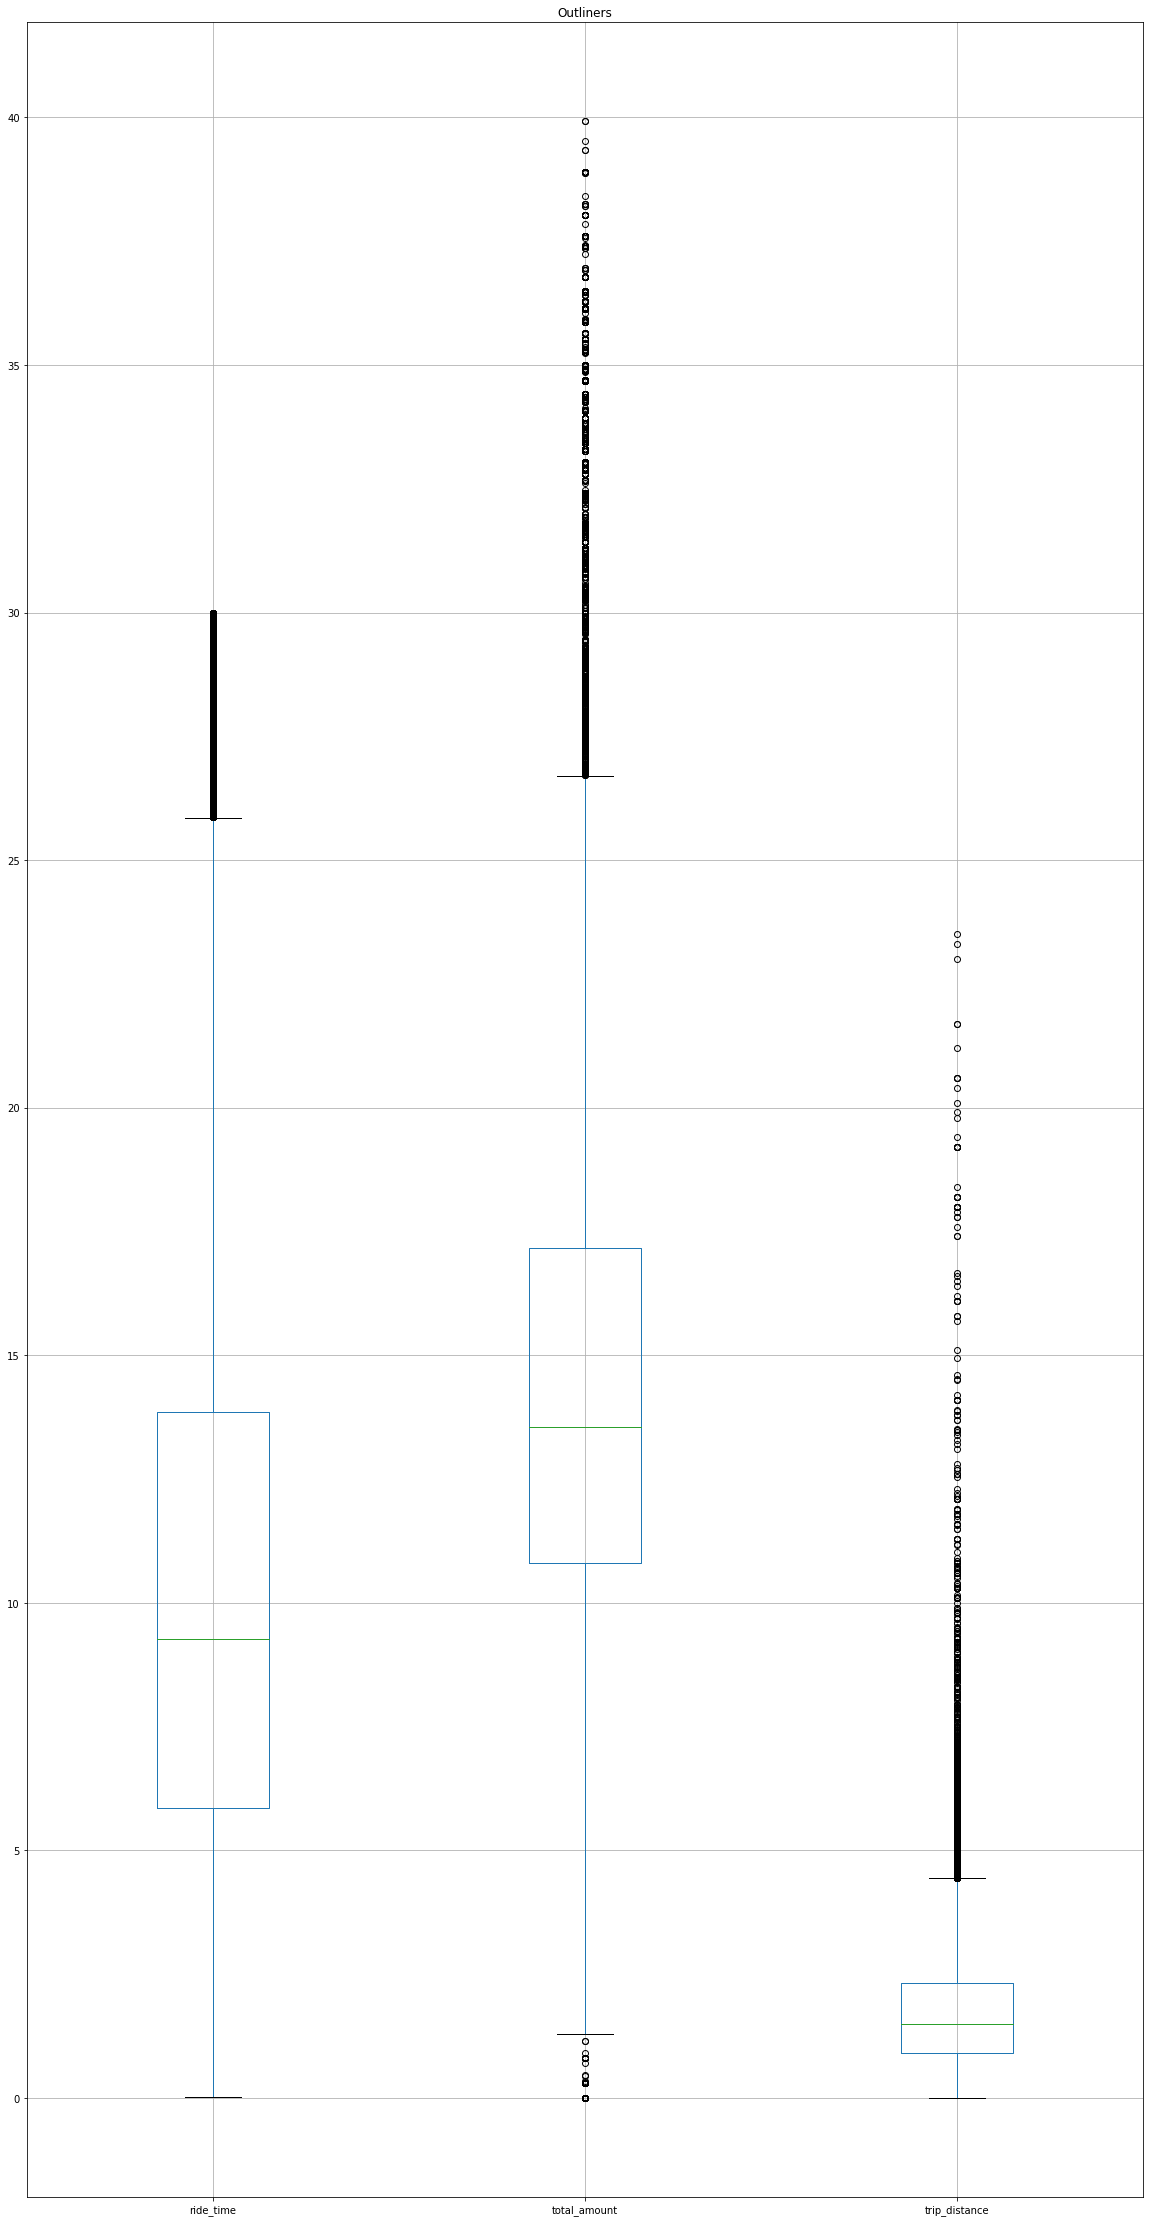

In [43]:
plt.subplots(figsize=(20,40))
plt.title("Outliners")
boxplot = mar2020.boxplot(column=['ride_time','total_amount','trip_distance'])

# Perform EDA on data usilizing both method:

## The TFDV (TensorFlow Data Validation)

In [45]:
jan2020 = jan2020.replace({'N':0, 'Y':1})

In [46]:
training_mar = tfdv.generate_statistics_from_dataframe(mar2020)
training_jan = tfdv.generate_statistics_from_dataframe(jan2020)
tfdv.visualize_statistics(lhs_statistics=training_jan, rhs_statistics=training_mar, lhs_name='Jan', rhs_name='Mar')

## Classic approach in EDA (Pandas, Numpy libraries)

In [47]:
import seaborn as sns

### correlation heatmap

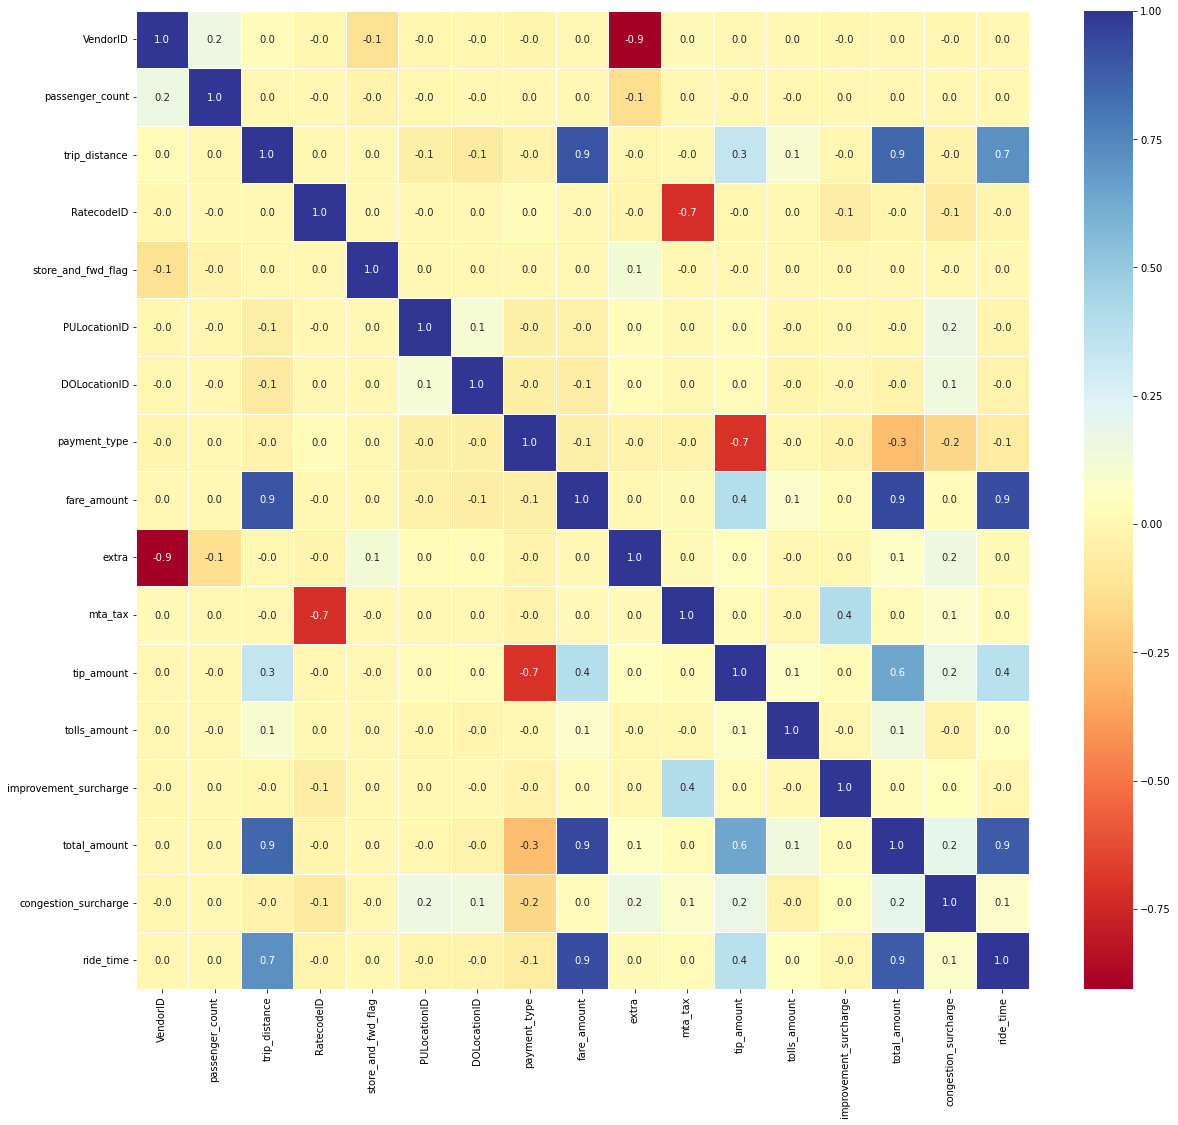

In [48]:
plt.figure(figsize=(20,18))
corr_mar=mar2020.corr()
sns.heatmap(corr_mar, linewidths=.5, cmap='RdYlBu', annot=True, fmt='.1f')
plt.show()

### payment_type

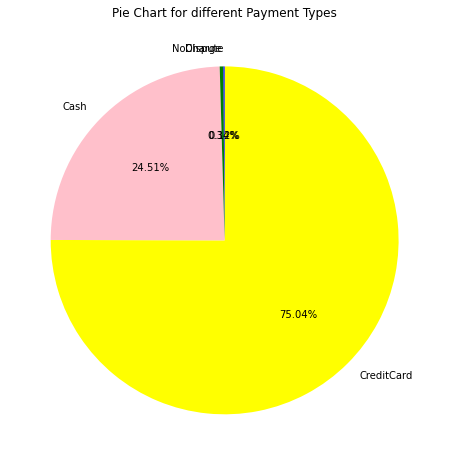

In [54]:
# frequencies of paymentType 1= Credit card 2= Cash 3= No charge 4= Dispute 5= Unknown 6= Voided trip
values = mar2020['payment_type'].value_counts().index
frequencies = mar2020['payment_type'].value_counts().values
# PieChart
fig = plt.figure(figsize=(20,8))
fig.add_subplot(1,2,1)
plt.title('Pie Chart for different Payment Types')
colors=['yellow','pink','green','blue']
labels=['CreditCard','Cash','NoCharge','Dispute']
explode=[0,0,0,0]
plt.pie(frequencies, colors=colors, labels=labels, explode=explode, autopct='%.2f%%',counterclock=False, startangle=90)
plt.show()

### passenger_count comparison Jan and Mar

In [56]:
passenger_mar = mar2020.groupby(['date']).sum().reset_index()
passenger_mar['month']='mar2020'
passenger_jan = jan2020.groupby(['date']).sum().reset_index()
passenger_jan['month']='jan2020'
passenger = pd.concat([passenger_jan, passenger_mar],axis=0).reset_index(drop=True)

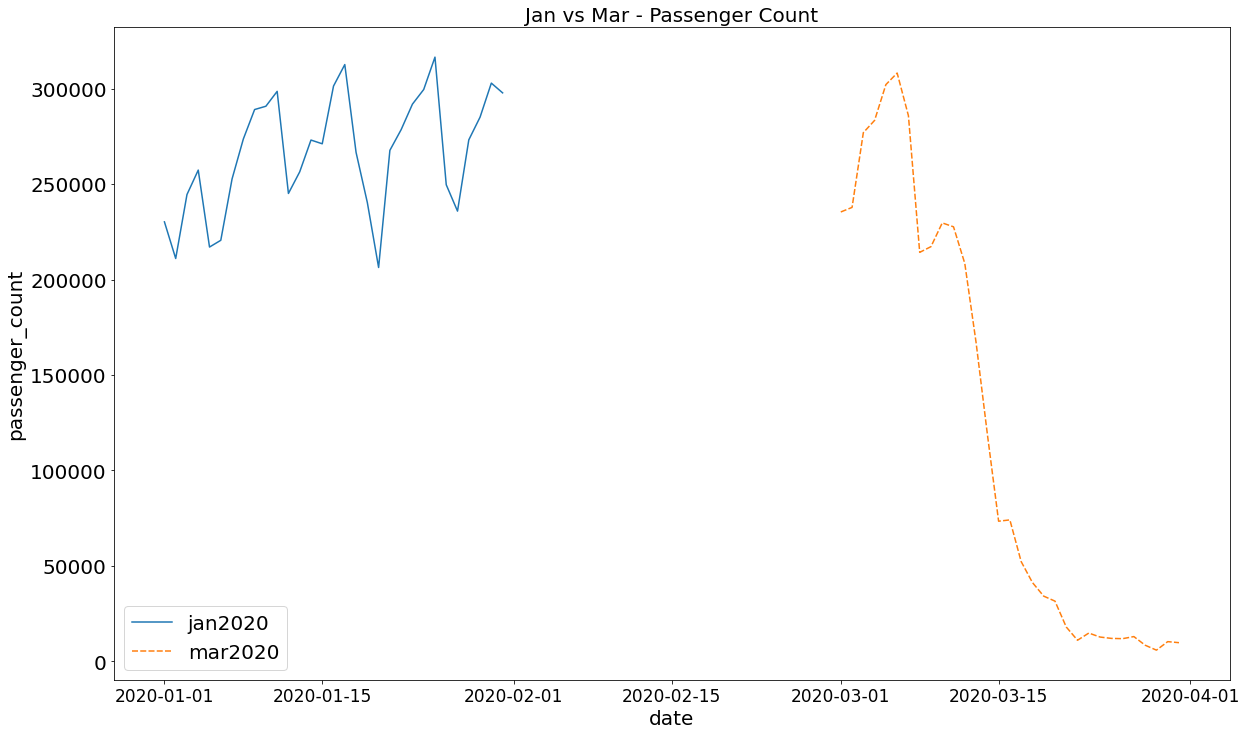

In [58]:
plt.figure(figsize=(20,12))
sns.lineplot(x=passenger['date'],y=passenger['passenger_count'],hue=passenger['month'],style=passenger['month']);
plt.xticks(rotation=360, size=17)
plt.yticks(size=20)
plt.xlabel('date',size=20)
plt.ylabel('passenger_count',size=20)
plt.title('Jan vs Mar - Passenger Count', size=20)
plt.legend(loc=3, prop={'size':20})
plt.show()

In [60]:
# for compare
import sweetviz as sv

In [61]:
compare_report = sv.compare([jan2020,'Jan'],[mar2020,'Mar'],"ride_time")
compare_report.show_html('Compare the data of Jan-2020 vs Mar-2020', open_browser=False)

                                             |      | [  0%]   00:00 -> (? left)

Report Compare the data of Jan-2020 vs Mar-2020 was generated.
